In [8]:
from DecoID.DecoID import DecoID
import matplotlib.pyplot as plt

#sets database to use

libFile = "../databases/HMDB_experimental.db"

key = "none"

mzCloudLib = "reference"

numCores = 4

#filename of query MS/MS data
file = "../exampleData/mzMLs/IROA_P1-6_ddMS2_pos_1Da.mzML"

#filename of peak list

peakFile = "../exampleData/IROA_p1-6_peak_table_pos_v3.csv"

#set parameters
usePeaks = True
DDA = True #data is DDA
massAcc = 10 #ppm tolerance
fragThresh= 0.01 #require non-zero dot product threshold
offset = .5 #half of isolation window width. Only for non-thermo data
useIso = True #use predicted M+1 isotopolgoue spectra
threshold = 0 #minimum dot product for reporting
lam = 5.0 #LASSO parameter
rtTol = float("inf") #retention time tolerance for database, inf means ignore RT
fragCutoff = 1000 #intensity threshold for MS/MS peaks



In [3]:
if __name__ == '__main__':

    #create DecoID object
    decID = DecoID(libFile, mzCloudLib, numCores,api_key=key)
    #read in data
    decID.readData(file, 2, usePeaks, DDA, massAcc,offset,peakDefinitions=peakFile,frag_cutoff=fragCutoff)



Library loaded successfully: 5944 spectra found
10127  MS2 spectra detected
Number of compounds with acquired MS2:  212
Number of spectra to deconvolve:  1983


In [5]:
contam = [x["percentContamination"] for x in decID.samples]

Text(0, 0.5, '# of MS/MS spectra')

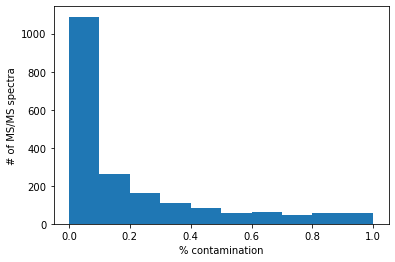

In [11]:
plt.hist(contam)
plt.xlabel("% contamination")
plt.ylabel("# of MS/MS spectra")